## Ejercicio 1.

Carga y Exploración de Datos

Objetivo: Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

Acciones:
Cargar el archivo Noticias.xlsx que contiene las noticias.

Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.

Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

Contexto: La columna Etiqueta en el conjunto de datos contiene categorías, algunas no especializadas o no tienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.

In [47]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [48]:
# Cargar el archivo de datos
file_path = '../Datos/Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


## Explorar la distribución de la columna Etiqueta para ver cuántas noticias pertenecen a cada categoría.

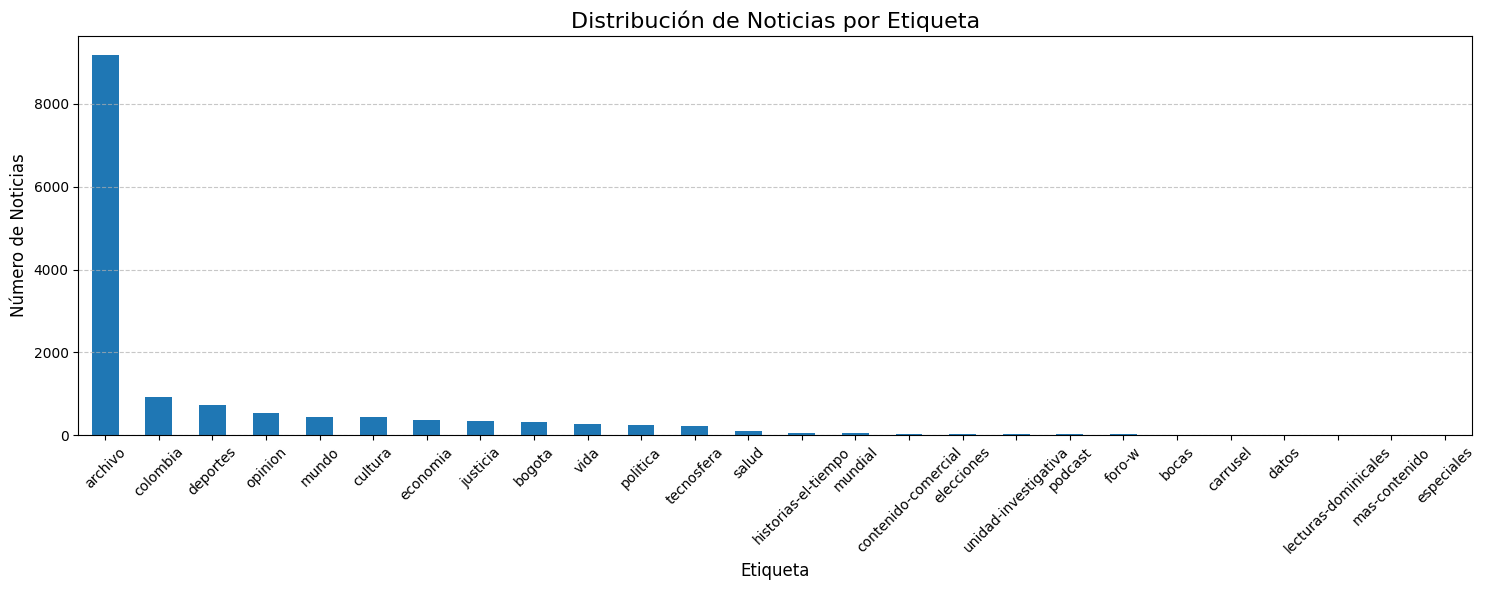

Etiqueta
archivo                 9187
colombia                 934
deportes                 727
opinion                  532
mundo                    446
cultura                  430
economia                 367
justicia                 343
bogota                   311
vida                     268
politica                 252
tecnosfera               214
salud                    106
historias-el-tiempo       57
mundial                   47
contenido-comercial       34
elecciones                33
unidad-investigativa      27
podcast                   20
foro-w                    18
bocas                     15
carrusel                   8
datos                      7
lecturas-dominicales       6
mas-contenido              4
especiales                 3
Name: count, dtype: int64

In [49]:
# Calcular la distribución de la columna 'Etiqueta'
etiqueta_distribution = data['Etiqueta'].value_counts()

# Graficar la distribución como un gráfico de barras
plt.figure(figsize=(15, 6))  # Configurar el tamaño de la figura
etiqueta_distribution.plot(kind='bar')  # Crear el gráfico de barras
plt.title('Distribución de Noticias por Etiqueta', fontsize=16)  # Título del gráfico
plt.xlabel('Etiqueta', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Número de Noticias', fontsize=12)  # Etiqueta del eje Y
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas del eje X para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula para el eje Y
plt.tight_layout()  # Ajustar automáticamente el diseño para evitar solapamientos
plt.show()  # Mostrar el gráfico

# Mostrar los conteos de noticias por etiqueta
etiqueta_distribution

Etiqueta dominante: La etiqueta "archivo" tiene una cantidad significativamente mayor de noticias en comparación con cualquier otra categoría. Esto indica que la mayoría del contenido en el dataset pertenece a esta etiqueta.

Categorías secundarias: Las etiquetas como "colombia", "deportes", y "opinion" son las más frecuentes después de "archivo", pero están mucho menos representadas, mostrando una gran disparidad en la distribución.

Otras: Hay muchas etiquetas con pocas noticias asociadas (frecuencia baja), lo que sugiere que el contenido está concentrado en unas pocas categorías principales.

Categorías relevantes (deportes, cultura, economía, justicia):

Estas categorías tienen una representación significativa, aunque menor en comparación con "archivo".
Son temas especializados que permiten realizar análisis más específicos, como la identificación de patrones dentro de áreas temáticas (deportes) o el análisis económico basado en contenido de noticias.

## Ejercicio 2

Filtrado de Datos

Objetivo: Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

Acciones:

Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.

Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

Contexto: Es importante filtrar los datos para enfocarnos en temas especializados porque algunas categorías pueden tener un discurso amplio y no se tratan de un tema especializado. Esto ayuda a mejorar la precisión del modelo al enfocarse en categorías bien definidas.

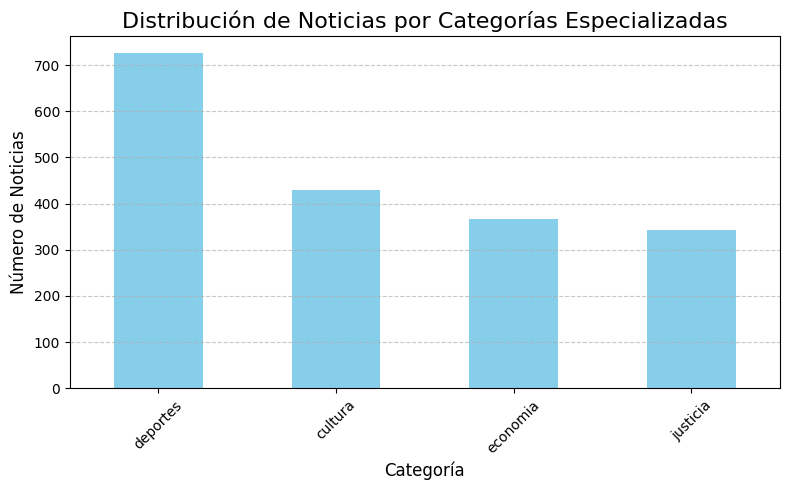

In [50]:
# Filtrar noticias por categorías relevantes excluyendo "archivo" y otras irrelevantes
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
datos_filtrados = data[data['Etiqueta'].isin(categorias_relevantes)]

# Verificar la distribución de las categorías filtradas
distribucion_filtrada = datos_filtrados['Etiqueta'].value_counts()

# Visualizar la distribución de las categorías filtradas
plt.figure(figsize=(8, 5))
distribucion_filtrada.plot(kind='bar', color='skyblue')
plt.title('Distribución de Noticias por Categorías Especializadas', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

Submuestreo: Si las categorías tienen diferentes cantidades de datos, se toma la misma cantidad que la categoría con menos datos, eliminando registros sobrantes de las categorías más grandes.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16360\264665382.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


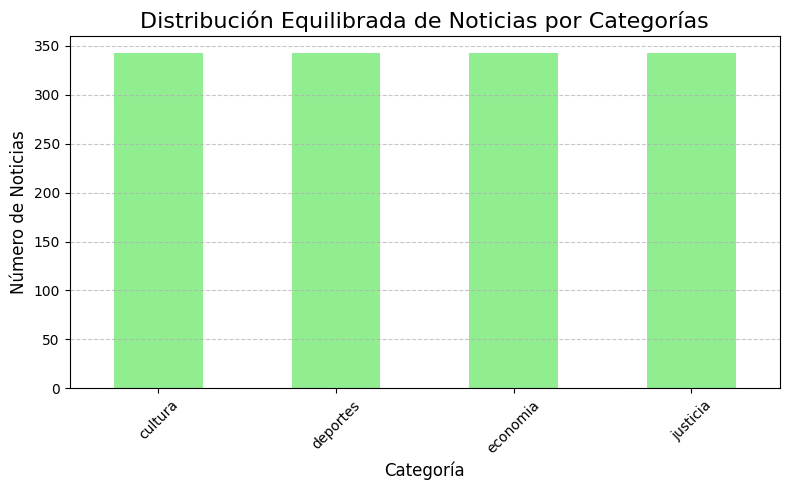

Etiqueta
cultura     343
deportes    343
economia    343
justicia    343
Name: count, dtype: int64


In [51]:
# Identificar el tamaño mínimo entre las categorías
min_count = datos_filtrados['Etiqueta'].value_counts().min()

# Submuestrear cada categoría para que todas tengan la misma cantidad de datos
datos_balanceados = (
    datos_filtrados.groupby('Etiqueta', group_keys=False)
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)

# Verificar la nueva distribución equilibrada
distribucion_balanceada = datos_balanceados['Etiqueta'].value_counts()

# Visualizar la distribución equilibrada
plt.figure(figsize=(8, 5))
distribucion_balanceada.plot(kind='bar', color='lightgreen')
plt.title('Distribución Equilibrada de Noticias por Categorías', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la nueva distribución en la consola
print(distribucion_balanceada)


### Sobremuestreo: Si las categorías tienen diferentes cantidades de datos, se duplican registros en las categorías con menos datos para igualar la cantidad de la categoría más grande.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16360\494191034.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(max_count, replace=True, random_state=42))


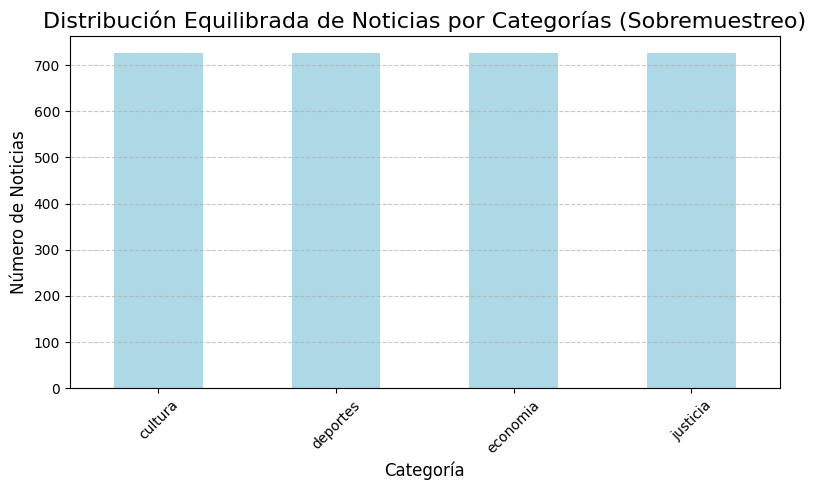

Etiqueta
cultura     727
deportes    727
economia    727
justicia    727
Name: count, dtype: int64


In [18]:
# Identificar el tamaño máximo entre las categorías
max_count = datos_filtrados['Etiqueta'].value_counts().max()

# Sobremuestrear cada categoría para igualar la cantidad al máximo
datos_balanceados = (
    datos_filtrados.groupby('Etiqueta', group_keys=False)
    .apply(lambda x: x.sample(max_count, replace=True, random_state=42))
    .reset_index(drop=True)
)

# Verificar la nueva distribución equilibrada
distribucion_balanceada = datos_balanceados['Etiqueta'].value_counts()

# Visualizar la distribución equilibrada
plt.figure(figsize=(8, 5))
distribucion_balanceada.plot(kind='bar', color='lightblue')
plt.title('Distribución Equilibrada de Noticias por Categorías (Sobremuestreo)', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Noticias', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar la nueva distribución en la consola
print(distribucion_balanceada)


## Ejercicio 3

Preprocesamiento de Texto

Objetivo: Preparar los datos textuales para el entrenamiento del modelo.

Acciones:

Convertir todo el texto a minúsculas para uniformidad.

Eliminar puntuación y números para reducir el ruido en los datos.

Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.

Tokenizar el texto, es decir, dividir el texto en palabras individuales.

Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

### Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [52]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')

,contenido,contenido_preprocesado
0,Las autoridades están buscando al conductor de...,las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e...",los andenes son para los peatones reclama enfá...
2,A las 7 de la noche me había quedado de encont...,a las de la noche me había quedado de encontr...
3,Atravesados. Eso es lo que se les pasa por la ...,atravesados eso es lo que se les pasa por la c...
4,“Estamos proponiendo la figura de un contrato ...,“estamos proponiendo la figura de un contrato ...


Dimensiones de los datos: (13738, 7)


In [54]:
# Se visualizan todas las columnas del data set
data.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia,las autoridades están buscando al conductor de...
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo,los andenes son para los peatones reclama enfá...
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo,a las de la noche me había quedado de encontr...
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo,atravesados eso es lo que se les pasa por la c...
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo,“estamos proponiendo la figura de un contrato ...


### Tokenizar el texto, es decir, dividir el texto en palabras individuales.

In [55]:
# Tokenización
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

,contenido_preprocesado,tokens
0,las autoridades están buscando al conductor de...,"[las, autoridades, están, buscando, al, conduc..."
1,los andenes son para los peatones reclama enfá...,"[los, andenes, son, para, los, peatones, recla..."
2,a las de la noche me había quedado de encontr...,"[a, las, de, la, noche, me, había, quedado, de..."
3,atravesados eso es lo que se les pasa por la c...,"[atravesados, eso, es, lo, que, se, les, pasa,..."
4,“estamos proponiendo la figura de un contrato ...,"[“, estamos, proponiendo, la, figura, de, un, ..."


In [56]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

Contenido preprocesado:  las autoridades están buscando al conductor de una moto que le lanzó el casco a carlos alberto carmona operador de grúa de la empresa segrup  quien perdió por una hora el conocimiento tras la agresión en un video quedó registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la caída se golpea la cabeza con la grúa que conduce  el agredido perdió el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde está el operador en el suelo luego su compañero agarra la moto y huye del lugar y a pocos metros recoge al agresor las autoridades buscan

### Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.

In [57]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[las, autoridades, están, buscando, al, conduc...","[autoridades, buscando, conductor, moto, lanzó..."
1,"[los, andenes, son, para, los, peatones, recla...","[andenes, peatones, reclama, enfática, carmenz..."
2,"[a, las, de, la, noche, me, había, quedado, de...","[noche, quedado, encontrar, boris, siempre, si..."
3,"[atravesados, eso, es, lo, que, se, les, pasa,...","[atravesados, pasa, cabeza, residentes, transe..."
4,"[“, estamos, proponiendo, la, figura, de, un, ...","[“, proponiendo, figura, contrato, civil, unió..."


### Aplicar padding a las secuencias de palabras para que todas tengan la misma longitud, facilitando el procesamiento por las redes neuronales.

#### con esta aplicacion de padding agrega dos columnas al data set 'sequences' y 'padded_sequences'. mirar si se deja esta o la que sigue

In [ ]:
# con esta aplicacion de padding agrega dos columnas al data set 'sequences' y 'padded_sequences'. mirar si se deja esta o la que sigue
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paso 1: Crear el tokenizador y ajustarlo a las palabras de tokens_sin_stopwords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokens_sin_stopwords'])

# Extraer el vocabulario generado (word_index)
word_index = tokenizer.word_index
#display(f"Vocabulario generado (word_index): {word_index}")

# Paso 2: Convertir las palabras a índices numéricos
data['sequences'] = tokenizer.texts_to_sequences(data['tokens_sin_stopwords'])

# Paso 3: Aplicar padding
max_len = 50  # Longitud máxima para el padding (ajústala según el caso)
data['padded_sequences'] = list(pad_sequences(data['sequences'], maxlen=max_len, padding='post'))

# Mostrar los resultados
print(data[['tokens_sin_stopwords', 'sequences', 'padded_sequences']].head())


                                tokens_sin_stopwords  \
0  [autoridades, buscando, conductor, moto, lanzó...   
1  [andenes, peatones, reclama, enfática, carmenz...   
2  [noche, quedado, encontrar, boris, siempre, si...   
3  [atravesados, pasa, cabeza, residentes, transe...   
4  [“, proponiendo, figura, contrato, civil, unió...   

                                           sequences  \
0  [180, 1761, 1690, 2802, 2163, 4326, 170, 887, ...   
1  [5962, 4658, 7393, 18465, 20074, 5393, 2804, 4...   
2  [306, 3253, 902, 9107, 173, 92, 12826, 90, 293...   
3  [40091, 68, 611, 2946, 11277, 4268, 7974, 516,...   
4  [9, 14630, 930, 772, 1003, 762, 1454, 9723, 72...   

                                    padded_sequences  
0  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
1  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
2  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
3  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13...  
4  [3, 15, 96, 86, 6, 7, 42, 112, 80, 5, 2, 1, 13..

#### con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
ojo: revise y el profe la deja asi para usar la varaible para la divion de datos.

In [ ]:
# con esta aplicacion de padding no se garega columna al data set y se guarda en una variable llamda padded_sequences, asi la tien el profe en ela guia 2. mirar si se da asi o como aplciada anterisomente que agrega dos columnas la data set
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paso 1: Crear el tokenizador y ajustarlo a las palabras de tokens_sin_stopwords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokens_sin_stopwords'])

# Extraer el vocabulario generado (word_index)
word_index = tokenizer.word_index
#print(f"Vocabulario generado (word_index): {word_index}")

# Paso 2: Convertir las palabras a índices numéricos
sequences = tokenizer.texts_to_sequences(data['tokens_sin_stopwords'])

# Paso 3: Aplicar padding y guardar en la variable padded_sequences
max_len = 50  # Longitud máxima para el padding 
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar los resultados
print(padded_sequences[:5])  # Muestra las primeras 5 secuencias con padding


Vocabulario generado (word_index): {'pm': 1, 'colombia': 2, 'valle': 3, 'manizales': 4, 'coronavirus': 5, 'mil': 6, 'mercados': 7, 'barranquilla': 8, '“': 9, '”': 10, 'cerca': 11, 'cauca': 12, 'cuarentena': 13, 'salud': 14, 'solidario': 15, 'recogido': 16, 'donatón': 17, 'casos': 18, 'vida': 19, 'posible': 20, 'manual': 21, 'cabina': 22, 'desinfección': 23, 'pueblo': 24, 'años': 25, 'acceder': 26, 'medicamentos': 27, 'médica': 28, 'fórmula': 29, 'mental': 30, 'guía': 31, 'venden': 32, 'especializadas': 33, 'cannabis': 34, 'farmacias': 35, 'bipolaridad': 36, 'medicamen': 37, 'si': 38, 'ciudad': 39, 'prueba': 40, 'colegio': 41, 'personas': 42, 'miedo': 43, 'par': 44, 'dos': 45, 'clases': 46, 'país': 47, 'mente': 48, 'ponga': 49, 'lógica': 50, 'matemáticas': 51, 'test': 52, 'matemática': 53, 'ejercite': 54, 'ciento': 55, 'garcía': 56, 'año': 57, 'ser': 58, 'medellín': 59, 'millones': 60, '’': 61, 'dijo': 62, '‘': 63, 'según': 64, 'parte': 65, 'tiempo': 66, 'diario': 67, 'pasa': 68, 'gobie

In [61]:
data

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado,tokens,tokens_sin_stopwords
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia,las autoridades están buscando al conductor de...,"[las, autoridades, están, buscando, al, conduc...","[autoridades, buscando, conductor, moto, lanzó..."
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo,los andenes son para los peatones reclama enfá...,"[los, andenes, son, para, los, peatones, recla...","[andenes, peatones, reclama, enfática, carmenz..."
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo,a las de la noche me había quedado de encontr...,"[a, las, de, la, noche, me, había, quedado, de...","[noche, quedado, encontrar, boris, siempre, si..."
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo,atravesados eso es lo que se les pasa por la c...,"[atravesados, eso, es, lo, que, se, les, pasa,...","[atravesados, pasa, cabeza, residentes, transe..."
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo,“estamos proponiendo la figura de un contrato ...,"[“, estamos, proponiendo, la, figura, de, un, ...","[“, proponiendo, figura, contrato, civil, unió..."
...,...,...,...,...,...,...,...,...,...
14391,14391,https://www.eltiempo.com/vida/viajar/una-viaje...,Una viajera pensó que la aerolínea Viva Air le...,La mujer hizo la denuncia en redes. La aerolín...,En Twitter es tendencia 'FCAS' por una denunci...,vida,en twitter es tendencia fcas por una denuncia ...,"[en, twitter, es, tendencia, fcas, por, una, d...","[twitter, tendencia, fcas, denuncia, hizo, muj..."
14392,14392,https://www.eltiempo.com/vida/viajar/un-dia-pe...,"Un día perfecto en Coco Cay, la isla privada d...",El proyecto Global Private Island Collection c...,La naviera internacional Royal Caribbean prese...,vida,la naviera internacional royal caribbean prese...,"[la, naviera, internacional, royal, caribbean,...","[naviera, internacional, royal, caribbean, pre..."
14393,14393,https://www.eltiempo.com/vida/viajar/visitar-b...,Barú: el paraíso colombiano abierto para todos...,Cuatro hoteles y el Aviario Nacional lanzarán ...,¿Necesita razones para ir a Barú? A menos de u...,vida,¿necesita razones para ir a barú a menos de un...,"[¿necesita, razones, para, ir, a, barú, a, men...","[¿necesita, razones, ir, barú, menos, hora, ca..."
14394,14394,https://www.eltiempo.com/vida/viajar/we-trade-...,"Con WeTrade, llega la hora LGBT a Bogotá",El 1 y 2 de noviembre se celebrará esta Feria ...,Se estima que la población LGTBI en Colombia e...,vida,se estima que la población lgtbi en colombia e...,"[se, estima, que, la, población, lgtbi, en, co...","[estima, población, lgtbi, colombia, millones,..."


In [34]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:


import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Lista de palabras comunes en español (stop words)
stop_words = set(stopwords.words('spanish'))

# Función para limpiar y preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación y números
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar palabras comunes (stop words)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar la función a la columna de texto relevante (por ejemplo, 'contenido')
datos_filtrados['contenido_procesado'] = datos_filtrados['contenido'].apply(preprocess_text)

# Tokenización y Padding para usar en redes neuronales
tokenizer = Tokenizer()
# Ajustar el tokenizador al texto procesado
tokenizer.fit_on_texts(datos_filtrados['contenido_procesado'].apply(lambda x: ' '.join(x)))

# Convertir texto en secuencias numéricas
sequences = tokenizer.texts_to_sequences(datos_filtrados['contenido_procesado'].apply(lambda x: ' '.join(x)))

# Aplicar padding para que todas las secuencias tengan la misma longitud
padded_sequences = pad_sequences(sequences, padding='post')

# Verificación de las secuencias procesadas
print("Primer texto tokenizado y con padding:", padded_sequences[0])
print("Tamaño del vocabulario:", len(tokenizer.word_index))

# Mostrar el DataFrame procesado
#import ace_tools as tools; tools.display_dataframe_to_user(name="Datos Procesados para NLP", dataframe=datos_filtrados)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'c:\\Users\\Lenovo\\anaconda3\\envs\\nlp_proyecto_final\\nltk_data'
    - 'c:\\Users\\Lenovo\\anaconda3\\envs\\nlp_proyecto_final\\share\\nltk_data'
    - 'c:\\Users\\Lenovo\\anaconda3\\envs\\nlp_proyecto_final\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [ ]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')



## Paso 2: Tokenización

En este paso, convertiremos el texto preprocesado en una lista de palabras individuales utilizando la tokenización.

In [ ]:
# Tokenización
data['tokens'] = data['contenido_preprocesado'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado', 'tokens']].head()

In [ ]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente

print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

## Paso 3: Eliminación de Stop Words

En este paso, eliminaremos las stop words de los tokens generados.

In [ ]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
data['tokens_sin_stopwords'] = data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Mostrar una vista previa de los tokens sin stop words
data[['tokens', 'tokens_sin_stopwords']].head()

## Paso 4: Cálculo de TF-IDF

En este paso, calcularemos la representación TF-IDF de los textos preprocesados. TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica que pondera la importancia de una palabra en un documento en relación con un corpus.

In [ ]:
# Unir los tokens en una sola cadena de texto para cada documento
data['texto_sin_stopwords'] = data['tokens_sin_stopwords'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto_sin_stopwords'])

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

### ¿Qué ganamos con TF-IDF?

- **Frecuencia de término (TF)**: Mide la frecuencia de una palabra en un documento. Si una palabra aparece muchas veces en un documento, es probable que sea importante para ese documento.
- **Frecuencia inversa de documento (IDF)**: Mide la rareza de una palabra en un corpus. Si una palabra es común en muchos documentos, es menos informativa que una palabra rara.

La fórmula de TF-IDF es:

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

Donde:

- $\text{TF}(t, d)$ es la frecuencia de la palabra $t$ en el documento $d$.
- $\text{IDF}(t)$ es la frecuencia inversa de documento de la palabra $t$ en el corpus.

pero, que fue lo que hicimos, en resumen, con TF-IDF, convertimos el texto en vectores numéricos que representan la importancia de las palabras en el texto.

In [ ]:
# Información adicional
lista_contenido= data['contenido_preprocesado'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad

lista_contenido= [f"{word} " if (i+1)%15!=0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

## Ahora convertimos la lista en un string

contenido= ''.join(lista_contenido)

text_info= f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.


Acabamos de convertir un documento de texto en un vector numérico que puede ser
utilizado en algoritmos de aprendizaje automático. Ese vector representa la importancia 
de cada palabra en el documento original y nos permite usar por ejemplo:

- ACP para reducir la dimensionalidad del vector.
- Clustering para agrupar documentos similares.
- Clasificación para predecir la categoría de un documento.
- Recuperación de información para encontrar documentos similares.

"""

print(text_info)



## Paso 5: Generación de Embeddings de Palabras con Word2Vec

En este paso, utilizaremos el modelo Word2Vec para generar embeddings de palabras. Los embeddings de palabras son representaciones vectoriales densas que capturan el significado semántico de las palabras.

In [ ]:
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens_sin_stopwords'], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save("../../Datos/Embeddings/word2vec.model")

## Guardar Resultados

Finalmente, guardaremos los resultados preprocesados en un archivo CSV para su posterior uso.

In [ ]:
# Guardar los resultados preprocesados
data.to_csv('../../Datos/Datos Preprocesados/Noticias_preprocesadas.csv', index=False)

## Ejercicio

### Ajuste Ejercicio

Hemos creado dos modelos de vectorización de palabras, uno basado en TF-IDF y otro basado en Word2Vec. Su primera tarea es:

1. Eliminar las palabras vacías del texto.
2. Calcular la representación TF-IDF de los textos preprocesados.
3. Generar embeddings de palabras utilizando Word2Vec.

Para la representación TF-IDF, utilice unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9. Para Word2Vec, utilice un tamaño de ventana de 5 y un tamaño de vector de 100.

Finalmente, guarde los resultados en un archivo CSV.

### Crear un Modelo Simple de ACP y Clustering

Después de generar los vectores de palabras, su segunda tarea es crear un modelo simple de ACP (Análisis de Componentes Principales) y aplicar clustering a los vectores generados. Utilice el algoritmo KMeans con 5 clusters.

PASOS:

1. Ajuste un modelo de ACP a los vectores generados.
2. Ajuste un modelo de KMeans con 5 clusters a los componentes principales.
3. Analice los resultados del clustering y determine si los clusters son significativos.

### Preguntas

1. ¿Qué puede inferir de los clusters generados?
2. ¿Qué palabras son las más representativas de cada cluster?
3. ¿Qué palabras tienen los embeddings más similares?
